<a href="https://colab.research.google.com/github/soniyafullar/DS_PY_Writeups_2102613/blob/main/Expt09_2102613_DSPY_MINIPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#1. Define your Problem statement and ML technique II(two) you propose to use.**

Hierarchical clustering
Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

Agglomerative : This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
Divisive : This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

**#Agglomerative Hierarchical clustering**
The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.

This hierarchy of clusters is represented in the form of the dendrogram.
Initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until 1/ K clusters are formed.

The main advantage is that we don’t need to specify the number of clusters, this comes with a price: performance  O(n3)
 . In sklearn’s implementation, we can specify the number of clusters to assist the algorithm’s performance.

 Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

Sometimes the results of K-means clustering and hierarchical clustering may look similar, but they both differ depending on how they work. As there is no requirement to predetermine the number of clusters as we did in the K-Means algorithm.

#**2. Write about working of ML technique II you have proposed.**
The working of the AHC algorithm can be explained using the below steps:

Step-1: Create each data point as a single cluster. Let's say there are N data points, so the number of clusters will also be N.

Step-2: Take two closest data points or clusters and merge them to form one cluster. So, there will now be N-1 clusters.

Step-3: Again, take the two closest clusters and merge them together to form one cluster. There will be N-2 clusters.

Step-4: Repeat Step 3 until only one cluster left. 

Step-5: Once all the clusters are combined into one big cluster, develop the dendrogram to divide the clusters as per the problem.

**#3. Pull your chosen data set from experiment 7**


In [1]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas 
pandas.__version__

'1.5.3'

In [2]:
import pandas as pd

In [4]:
#import numpy and pandas

In [5]:
# read file
data=pd.read_csv('/content/sample_data/BREASTCANCER.csv')
print('the values',data.columns.values)
data.head()

the values ['age' 'bmi' 'glucose' 'insulin' 'homa' 'leptin' 'adiponectin' 'resistin'
 'mcp_1' 'classification']


,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


**#4.Do pre-processing as per requirements of ML technique II.**



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [7]:
raw_df = pd.read_csv('/content/sample_data/BREASTCANCER.csv')
raw_df = raw_df.drop('bmi', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,age,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
0,48,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1


In [8]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['age', 'classification'] 
  
X_principal.head(2)

,age,classification
0,-0.747875,-0.325694
1,-0.700871,0.041741


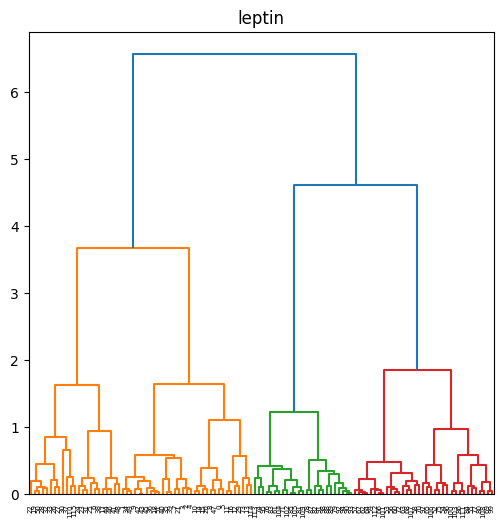

In [9]:
plt.figure(figsize =(6, 6)) 
plt.title('leptin') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

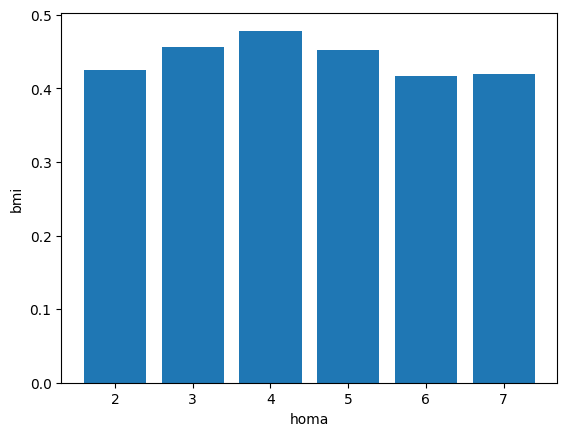

In [10]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('homa', fontsize = 10) 
plt.ylabel('bmi', fontsize = 10) 
plt.show() 

In [11]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

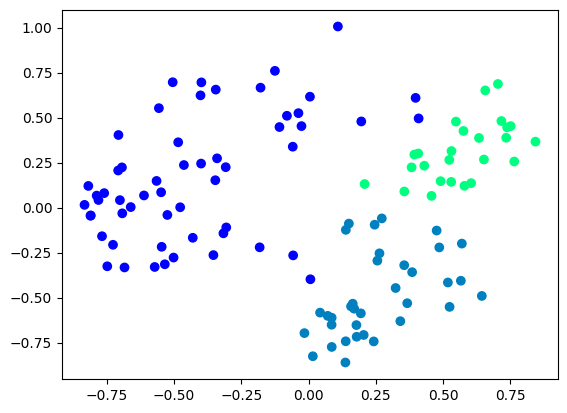

In [14]:
# Visualizing the clustering 
plt.scatter(X_principal['age'], X_principal['classification'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 


**#5. Divide Data set in to training and validation sets.**


In [15]:
# import modules
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# read the dataset
df = pd.read_csv('/content/sample_data/BREASTCANCER.csv')

# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.05, random_state=0)

In [16]:
X_test

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1
10,34,21.470000,78,3.469,0.667436,14.5700,13.110000,6.92000,354.600
74,46,22.210000,86,36.940,7.836205,10.1600,9.760000,5.68000,312.000
66,54,24.218750,86,3.730,0.791257,8.6874,3.705230,10.34455,635.049
51,77,25.900000,85,4.580,0.960273,13.7400,9.753260,11.77400,488.829
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.37010,1698.440


In [17]:
y_test

10    1
74    2
66    2
51    1
7     1
78    2
Name: classification, dtype: int64

**#6. Perform training**

In [18]:
X_train

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1
92,52,30.801249,87,30.212,6.483495,29.2739,6.268540,24.24591,764.667
90,40,30.836531,128,41.894,13.227332,31.0385,6.160995,17.55503,638.261
107,46,33.180000,92,5.750,1.304867,18.6900,9.160000,8.89000,209.190
62,49,21.367521,78,2.640,0.507936,6.3339,3.886145,22.94254,737.672
30,66,36.212279,101,15.533,3.869788,74.7069,7.539550,22.32024,864.968
...,...,...,...,...,...,...,...,...,...
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
67,64,22.222222,98,5.700,1.377880,12.1905,4.783985,13.91245,395.976
64,59,22.832879,98,6.862,1.658774,14.9037,4.230105,8.20490,355.310
47,78,25.300000,60,3.508,0.519184,6.6330,10.567295,4.66380,209.749


In [20]:
y_train

92     2
90     2
107    2
62     2
30     1
      ..
112    2
67     2
64     2
47     1
44     1
Name: classification, Length: 110, dtype: int64

**#6. Perform validation**


In [21]:
def read_file():
    df = pd.read_csv('/content/sample_data/BREASTCANCER.csv')
    if(df.empty):
        print ('CSV file is empty')
    else:
        print ('CSV file is not empty')
        return df

In [22]:
df = read_file()

CSV file is not empty


In [23]:
import pandas as pd
df = pd.read_csv('/content/sample_data/BREASTCANCER.csv', nrows=2)
for dtype in df.dtypes.iteritems():
    print(dtype)

('age', dtype('int64'))
('bmi', dtype('float64'))
('glucose', dtype('int64'))
('insulin', dtype('float64'))
('homa', dtype('float64'))
('leptin', dtype('float64'))
('adiponectin', dtype('float64'))
('resistin', dtype('float64'))
('mcp_1', dtype('float64'))
('classification', dtype('int64'))


<ipython-input-23-82e3a9a881b0>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for dtype in df.dtypes.iteritems():


In [24]:
import pandas as pd
data = pd.read_csv('/content/sample_data/BREASTCANCER.csv')
df = df[sorted(data)]
validation = df
validation['age'] = validation['leptin'].apply(lambda x: True if x in df else False)
validation = validation[validation['age'] == True].reset_index()
df

,adiponectin,age,bmi,classification,glucose,homa,insulin,leptin,mcp_1,resistin
0,9.702400,False,23.500000,1,70,0.467409,2.707,8.8071,417.114,7.99585
1,5.429285,False,20.690495,1,92,0.706897,3.115,8.8438,468.786,4.06405


In [25]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
        except ValueError:
            pass
print(df.dtypes)

adiponectin       float64
age                  bool
bmi               float64
classification      int64
glucose             int64
homa              float64
insulin           float64
leptin            float64
mcp_1             float64
resistin          float64
dtype: object


In [27]:
for col in df.columns:
    miss = df[col].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(col,miss))
    else:
        print("{} has NO missing value!".format(col))



adiponectin has NO missing value!
age has NO missing value!
bmi has NO missing value!
classification has NO missing value!
glucose has NO missing value!
homa has NO missing value!
insulin has NO missing value!
leptin has NO missing value!
mcp_1 has NO missing value!
resistin has NO missing value!


**#8.Report Accuracy of your trained ML Model.**

In [26]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score

#define array of actual classes
actual = np.repeat([1, 0], repeats=[20, 380])

#define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats=[15, 5, 5, 375])

#calculate balanced accuracy score
balanced_accuracy_score(actual, pred)

0.868421052631579

0.868421052631579

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
nb_samples = 1000
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [32]:
print(accuracy_score(ytest, model.predict(xtest)))

0.955


In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions1 = logreg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[1 2]
 [0 3]]


              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



In [31]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.6666666666666666
